# 탐색적 자료분석

In [1]:
import pandas as pd
import numpy as np
import folium
from folium import plugins
import warnings
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import json
warnings.filterwarnings(action='ignore')
plt.rc('font',family='Malgun Gothic')

import plotly
import plotly.express as px
import matplotlib.pylab as plt
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.default = "notebook_connected"

# window 시각화 중 한국어 지원하는 코드 
# 시각화, 한글깨짐 처리
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False
if  platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
    
pd.set_option('display.max_rows', 40000) # 최대 줄 수 설정
pd.set_option('display.width', 10000) # 표시할 가로 길이 설정
pd.set_option('display.max_columns', 10000) # 최대 열 수 설정

### 누적 확진자, 사망자, 완치자

In [2]:
covid_sum2 = pd.read_excel('C:/Users/JiWoongChoi/Desktop/DATA/학교/빅데이터 사업단/2020년 2차 경진대회/데이터/1. 코로나 발생현황/코로나 발생 현황2.xlsx', sheet_name = "전국 누적  확진,음성,사망자")
covid_sum2.head()

,date,confirmed,released,deceased
0,2020-01-20,1,0,0
1,2020-01-21,1,0,0
2,2020-01-22,1,0,0
3,2020-01-23,1,0,0
4,2020-01-24,2,0,0


In [3]:
#12월 27일 기준.

fig = go.Figure()
fig.add_trace(go.Scatter(x=covid_sum2['date'],y=covid_sum2['released'],
             mode='lines+markers', name='해제자'))
fig.add_trace(go.Scatter(x=covid_sum2['date'],y=covid_sum2['confirmed'],
             mode='lines+markers', name='확진자'))
fig.add_trace(go.Scatter(x=covid_sum2['date'],y=covid_sum2['deceased'],
             mode='lines+markers', name='사망자'))


fig.update_layout(title='확진자|해제자|사망자',
                autosize=False,
                width=950,
                height=1000 ,
                paper_bgcolor=" snow")

fig.update_yaxes(title_text="누적 인원(명)",range=[0, 59000])
fig.update_xaxes(title_text="기간(1월20일 ~ 12월 27일)")
fig.show()

### 연령별 확진자

In [4]:
covid_sum3 = pd.read_excel('C:/Users/JiWoongChoi/Desktop/DATA/학교/빅데이터 사업단/2020년 2차 경진대회/데이터/1. 코로나 발생현황/코로나 발생 현황2.xlsx', sheet_name = "연령대별 시각화")
covid_sum3.head()

,date,유아기,10대,20대,30대,40대,50대,60대,70대,80세 이상
0,2020-03-02,32,169,1235,506,633,834,530,192,81
1,2020-03-03,34,204,1417,578,713,952,597,224,93
2,2020-03-04,34,233,1575,631,790,1051,646,260,108
3,2020-03-05,38,257,1727,659,847,1127,699,288,124
4,2020-03-06,45,292,1877,693,889,1217,763,340,168


In [5]:
#12.27기준
#출처 - 통계청

raw_data = [
    ["유아기", 1927],
    ["80세 이상", 2802],
    ["10대", 3544],
    ["70대", 4472],
    ["30대", 7226],
    ["40대", 8033],
    ["60대", 8939],
    ["20대", 9281],
    ["50대", 10648]
]

age = pd.DataFrame(raw_data, columns = ["age", "count"])
age['count'] = age['count'].sort_values()
age

,age,count
0,유아기,1927
1,80세 이상,2802
2,10대,3544
3,70대,4472
4,30대,7226
5,40대,8033
6,60대,8939
7,20대,9281
8,50대,10648


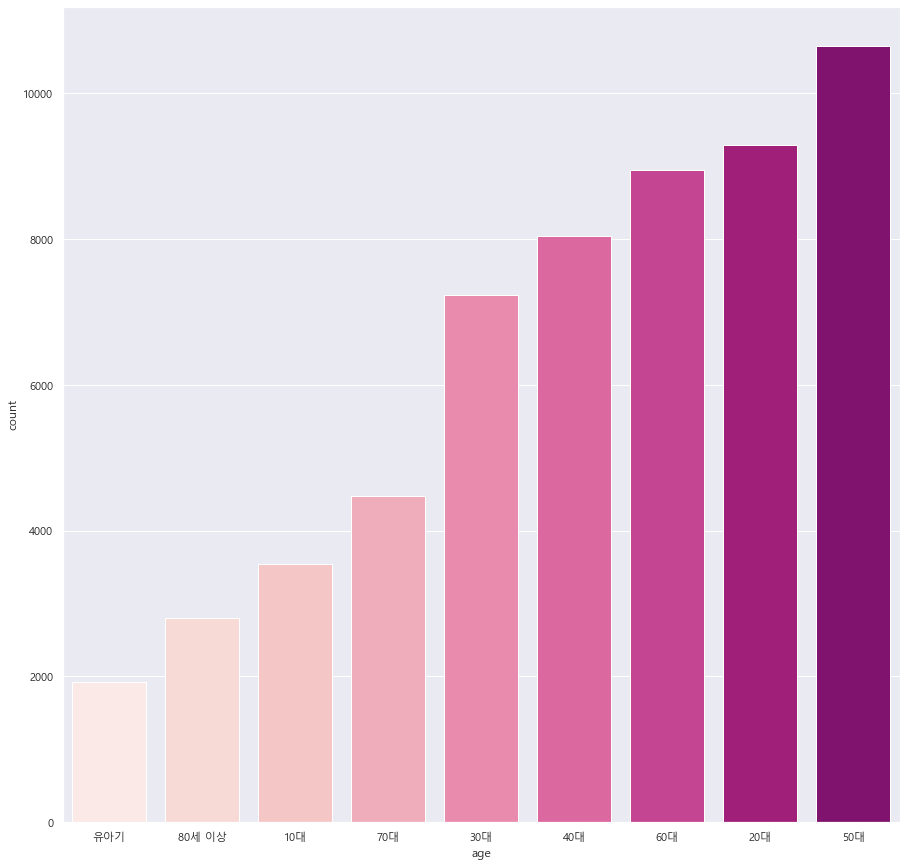

In [8]:
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False
if  platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)

sns.set_palette("RdPu",10)
sns.barplot(data= age, x= "age", y= "count")
sns.set(rc={'figure.figsize':(15,15)})
plt.show()

### 전국 연령별 사망자

In [9]:
#12.27기준
#출처 - 통계청

raw_data = [
    ["유아기", 0],
    ["10대", 0],
    ["20대", 0],
    ["30대", 0],
    ["40대", 7],
    ["50대", 30],
    ["60대", 94],
    ["70대", 236],
    ["80대", 438]
]

age = pd.DataFrame(raw_data, columns = ["age", "count"])
age

,age,count
0,유아기,0
1,10대,0
2,20대,0
3,30대,0
4,40대,7
5,50대,30
6,60대,94
7,70대,236
8,80대,438


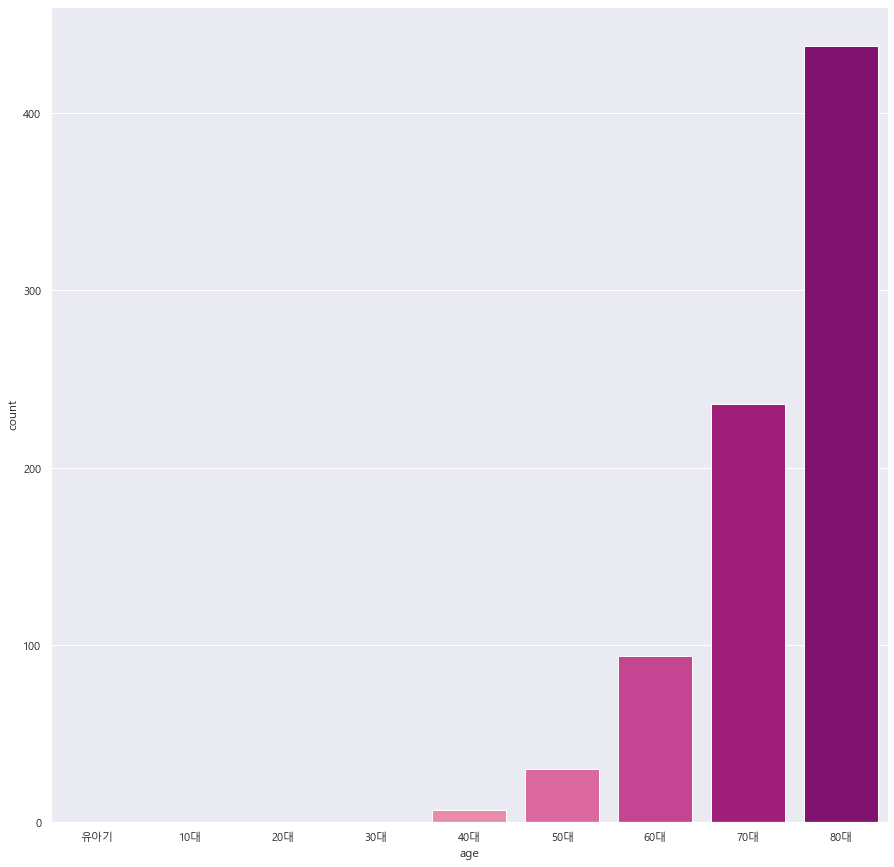

In [12]:
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False
if  platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)

sns.set_palette("RdPu",10)
sns.barplot(data= age, x= "age", y= "count")
sns.set(rc={'figure.figsize':(15,15)})
plt.show()

### 전국 시도별 확진자 추이

In [13]:
# 12.27.00시 기준.

raw_data = [
        ['Seoul',17430],
        ['Busan', 1704],
        ['Daegu', 7664], 
        ['Incheon', 2654], 
        ['Gwangju', 1037], 
        ['Daejeon', 786], 
        ['Ulsan', 616], 
        ['Sejongsi', 141], 
        ['Gyeonggi-do', 13500], 
        ['Gangwon-do', 1106], 
        ['Chungcheongbuk-do', 1043], 
        ['Chungcheongnam-do', 1546], 
        ['Jeollabuk-do', 784], 
        ['Jeollanam-do', 543], 
        ['Gyeongsangbuk-do', 2304],
        ['Gyeongsangnam-do', 1226], 
        ['Jeju-do',381]
]

data= pd.DataFrame(raw_data, columns = ['city', 'count'])
data


,city,count
0,Seoul,17430
1,Busan,1704
2,Daegu,7664
3,Incheon,2654
4,Gwangju,1037
5,Daejeon,786
6,Ulsan,616
7,Sejongsi,141
8,Gyeonggi-do,13500
9,Gangwon-do,1106


In [14]:
#12.27 기준.

count = data['count'].sort_values()
city = ['세종', '제주', '전남', '울산', '전북', '대전', '광주', '충북', '강원', '경남', '충남', '부산', 
        '경북', '인천', '대구', '경기도', '서울']
total_patient = 56,872

colors = ['lightslategray',] * 17
colors[-1] = 'tomato'
lines = ['black'] * 17
lines[-1] = 'red'


fig = px.bar(data, x= count, y=city, title = '시도 별 확진자 수 (12/27일 기준)',
            height=800, width=950,
            text=count, 
            )

fig.update_traces(marker_color=colors, marker_line_color=lines,
                  marker_line_width=1.5, opacity=0.6)
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=15, uniformtext_mode='hide')

fig.update_yaxes(title_text="시도")
fig.update_xaxes(title_text="누적 인원(12월 27일기준)")

pyo.iplot(fig)

### 서울특별시 구별 누적 확진자 추이

In [15]:
import json
geo_path = 'C:/Users/JiWoongChoi/Desktop/DATA/학교/빅데이터 사업단/2020년 2차 경진대회/데이터/02. skorea_municipalities_geo_simple.json'
seoul_geo_str = json.load(open(geo_path, encoding="utf-8"))
seoul_geo_str

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'id': '강동구',
   'properties': {'code': '11250',
    'name': '강동구',
    'name_eng': 'Gangdong-gu',
    'base_year': '2013'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[127.11519584981606, 37.557533180704915],
      [127.16683184366129, 37.57672487388627],
      [127.18408792330152, 37.55814280369575],
      [127.16530984307447, 37.54221851258693],
      [127.14672806823502, 37.51415680680291],
      [127.12123165719615, 37.52528270089],
      [127.1116764203608, 37.540669955324965],
      [127.11519584981606, 37.557533180704915]]]}},
  {'type': 'Feature',
   'id': '송파구',
   'properties': {'code': '11240',
    'name': '송파구',
    'name_eng': 'Songpa-gu',
    'base_year': '2013'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[127.0690698130372, 37.522279423505026],
      [127.10087519791962, 37.524841220167055],
      [127.1116764203608, 37.540669955324965],
      [127.12123165719615, 37.52528270089

In [16]:
# 12.27.00시 기준.
# 출처 - 서울특별시

raw_data = [
            ['Dobong-gu',526],
            ['Dongdaemun-gu',605],
            ['Dongjak-gu',739],
            ['Eunpyeong-gu', 721],
            ['Gangbuk-gu',387],
            ['Gangdong-gu',537],
            ['Gangnam-gu', 874],
            ['Gangseo-gu', 1298],
            ['Geumcheon-gu', 278],
            ['Guro-gu', 573],
            ['Gwanak-gu', 932],
            ['Gwangjin-gu', 423],
            ['Jongno-gu', 371],
            ['Jung-gu', 266],
            ['Jungnang-gu', 676],
            ['Mapo-gu', 655],
            ['Nowon-gu', 750],
            ['Seocho-gu', 772],
            ['Seodaemun-gu', 477],
            ['Seongbuk-gu', 750],
            ['Seongdong-gu', 427],
            ['Songpa-gu', 1042],
            ['Yangcheon-gu', 643],
            ['Yeongdeungpo-gu', 650],
            ['Yongsan-gu', 400]
]


data= pd.DataFrame(raw_data, columns = ['gu', 'count'])
data

,gu,count
0,Dobong-gu,526
1,Dongdaemun-gu,605
2,Dongjak-gu,739
3,Eunpyeong-gu,721
4,Gangbuk-gu,387
5,Gangdong-gu,537
6,Gangnam-gu,874
7,Gangseo-gu,1298
8,Geumcheon-gu,278
9,Guro-gu,573


In [17]:
#12월 27일 기준으로 누적 확진자 상위 3개구는 강서구, 송파구, 관악구였다.
# 구별로 몇명인지 띄울수 있도록 하기.


# 맵 초기 표시 위치 설정
map = folium.Map(location=[37.5602, 127.000], zoom_start=11)
#folium 패키지로 오픈소스지도 가져오기

folium.Choropleth(geo_data = seoul_geo_str, #geo_data옵션 = 지도 json을 지도에표시하기
               data = data, # data옵션 = 사용될 데이터의 값 
               columns = ['gu', 'count'],
               key_on = 'feature.properties.name_eng',
               highlight=True,
               fill_color = 'PuRd', #PuRd, YlGnBu #넣어줄 색깔 표시
               ).add_to(map) #“key_on=”은 JSON지도와 data라는 데이터 프레임을 매칭할때 사용할 데이타를 지정하는 곳이다. 
folium.Popup(data['gu']).add_to(map)

map

### 감염경로 상위 10개

In [18]:
patient = pd.read_csv('C:/Users/JiWoongChoi/Desktop/DATA/학교/빅데이터 사업단/2020년 2차 경진대회/데이터/4. 서울시 코로나 확진자 현황/서울시 코로나19 확진자 현황2.csv', encoding='cp949')

In [19]:
#새롭게 데이터를 다운받았다.
#12.25일까지 서울시 코로나 19 데이터를 받았다.

a = patient['접촉력'].value_counts()
print(a.head(2))
print("------------------------------------------------------------------------")

# 기타 확진자 접촉, 감염경로 조사중과 같이 확진자의 감염 경로를 알 수 없는 상위 2개의 경우를 제외하였다.
a = a[3:13]
a

기타 확진자 접촉    4749
감염경로 조사중     3153
Name: 접촉력, dtype: int64
------------------------------------------------------------------------


성북구 사랑제일교회 관련      641
확인 중               586
동부구치소 관련           490
해외 접촉 추정           404
강서구 교회 관련          224
콜센터 관련             221
강서구 댄스교습관련 시설      209
종로구 소재 파고다타운 관련    208
해외 유입              181
이태원 클럽 관련          139
Name: 접촉력, dtype: int64

In [20]:
#주요 감염경로 비율 시각화
fig = px.pie(a, values='접촉력', names= a.index,
                 title='주요 감염|경로')
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.show()

# 전처리 및 모델링 후 수치 확인

In [28]:
from datetime import datetime as dt
from statsmodels.tsa.arima_model import ARIMA
from dateutil.relativedelta import relativedelta
from statsmodels.tsa.api import SimpleExpSmoothing, Holt, ExponentialSmoothing

from sklearn.preprocessing import StandardScaler

from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import xgboost

from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import time

In [3]:
df=pd.read_excel("데이터세트-5/1. 코로나 발생현황/타겟.xlsx",parse_dates=['date'])

In [5]:
move=pd.read_csv("데이터세트-5/2. 구글 이동성 데이터 세트/2020_KR_Region_Mobility_Report.csv",parse_dates=['date'])

In [7]:
recent=pd.read_csv("데이터세트-5/4. 서울시 코로나 확진자 현황/서울시 코로나19 확진자 현황.csv",encoding='ANSI',parse_dates=['확진일'])

In [8]:
search=pd.read_csv("데이터세트10-11/11. 네이버 검색어/검색어.csv",encoding='ANSI',parse_dates=['date'])


### 서울시코로나19 확진자 현황 데이터

In [9]:
# 그룹별 접촉력과 여행력
a=recent.groupby('확진일').접촉력.apply(lambda x: x.mode())    # 확진일 별 접촉력의 최빈값
rre=recent.groupby(['확진일']).agg({"여행력":'count'}).reset_index()   # 확진일 별 여행경험있는 사람 카운트
ac=[]
for i in range(357):
    ac.append(a[i])
a=pd.DataFrame(ac) 
rre['접촉력']=a[0]

In [10]:
#년월일 합치기
rre['확진일']=rre['확진일'].str.split(".")
az=[]
bz=[]
for i in range(305):
    az.append(rre['확진일'][i][0])
    bz.append(rre['확진일'][i][1])
    
rre['년']=2020
rre['월']=az
rre['일']=bz   
    
rre["date"] = rre["년"].map(str) + "-" + rre["월"].map(str) + "-" + rre["일"]

In [11]:
rre.drop(columns=['년' , '월','일','확진일'], inplace=True)

In [12]:
rre['date'] = pd.to_datetime(rre['date'],infer_datetime_format=True)

### 구글 이동성

In [14]:
df1=df.copy()

In [15]:
df1=pd.merge(df1,search, how='left', on='date')

In [38]:
# 데이터 통합
move_data=move.copy()
move_=move_data.iloc[:,7:]
new=pd.merge(df1,move_, how='left', on='date')

In [39]:
new_=pd.merge(new,rre, how='left', on='date')

결측치

In [51]:
new_.isnull().sum()

date                                                  0
확진자 수                                                 0
기온                                                    0
풍속                                                    0
마스크                                                   0
코로나                                                   0
확진자                                                   0
retail_and_recreation_percent_change_from_baseline    0
grocery_and_pharmacy_percent_change_from_baseline     0
parks_percent_change_from_baseline                    0
transit_stations_percent_change_from_baseline         0
workplaces_percent_change_from_baseline               0
residential_percent_change_from_baseline              0
여행력                                                   0
접촉력                                                   0
dtype: int64

In [52]:
# 여행력 중앙값
new_['여행력'].fillna(new_['여행력'].mode()[0],inplace=True) 

# 접촉력 최빈값
pd.DataFrame(new_['접촉력'].value_counts())
new_=new_.fillna(value='해외 접촉 추정')

In [53]:
#모든 수치변수를 정규화  /  범주변수를 더미화하기전에 실행
standard= new_.copy()
del standard['확진자 수']
num_cols = standard.columns[standard.dtypes.apply(lambda c: np.issubdtype(c, np.number))]
scaler=StandardScaler()
standard[num_cols] = scaler.fit_transform(standard[num_cols])

In [56]:
new_=new_.iloc[:,:2]
new_=pd.merge(new_,standard, how='left', on='date')

In [60]:
new_ = pd.get_dummies(new_, columns=['접촉력'])

In [61]:
new_=new_.drop_duplicates(['date']) 

In [62]:
df1=new_

# 모델링

### 회귀

In [69]:
x_train=df1.iloc[:228,2:]
y_train=df1.iloc[:228,1]
x_test=df1.iloc[228:,2:]
y_test=df1.iloc[228:,1]

In [63]:
#월,일 변수 생성
df1_reg=df1.copy()
df1_reg['month']=df1_reg['date'].dt.month
df1_reg['day']=df1_reg['date'].dt.day

In [64]:
x_train_reg=df1_reg.iloc[:228,2:]
y_train_reg=df1_reg.iloc[:228,1]
x_test_reg=df1_reg.iloc[228:,2:]
y_test_reg=df1_reg.iloc[228:,1]

LinearRegression

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
model = LinearRegression()
model.fit(x_train_reg,y_train_reg)

LinearRegression()

In [67]:
pree=model.predict(x_test_reg)

In [70]:
mse = mean_squared_error(y_test, pree) 
mse

1.4399788326146927e+19

GradientBoosting

In [71]:
GBR = GradientBoostingRegressor(loss='huber', n_estimators=2000, learning_rate=.05)

cv_score = cross_val_score(GBR, x_train_reg, x_train_reg, cv=10, n_jobs=-1)

print(f"GBR Model Max Test Score: {cv_score.max().round(4)*100}%")

GBR.fit(x_train_reg, y_train_reg)

GBR Model Max Test Score: nan%


GradientBoostingRegressor(learning_rate=0.05, loss='huber', n_estimators=2000)

In [72]:
pre=GBR.predict(x_test_reg)
pre

array([ 52.25841594,  60.16558787,  65.07713027,  82.55593528,
        83.68654065,  83.02478051,  76.98317436,  91.25763184,
        71.44565512,  84.98494171,  82.79761516, 112.87167473,
       126.18592837, 107.02635699, 107.25249817,  99.2117491 ])

In [73]:
mse = mean_squared_error(y_test, pre) 
mse

2944.185664638

XgBoost

In [74]:
xgb_model = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

xgb_model.fit(x_train_reg,y_train_reg)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.08, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.75,
             tree_method='exact', validate_parameters=1, verbosity=None)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

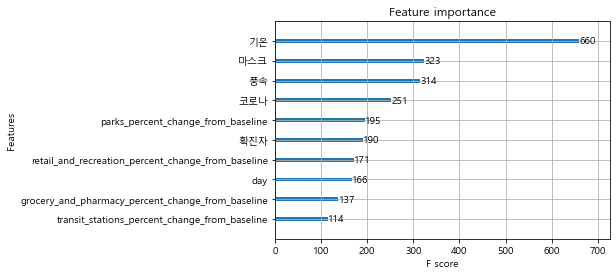

In [76]:
xgboost.plot_importance(xgb_model,max_num_features=10)

In [77]:
predictions = xgb_model.predict(x_test_reg)
predictions

array([51.321644, 44.953827, 56.74164 , 35.88104 , 32.909893, 35.453484,
       44.615623, 38.241947, 36.458454, 48.718784, 38.43444 , 52.301094,
       64.92875 , 66.69225 , 67.445404, 61.39501 ], dtype=float32)

In [78]:
mse = mean_squared_error(y_test, predictions) 
mse

8742.014462488392

RF

In [79]:
rf = RandomForestRegressor(n_estimators=10,criterion='mse', random_state=777) 
rf.fit(x_train_reg, y_train_reg)

RandomForestRegressor(n_estimators=10, random_state=777)

In [80]:
rf_pre=rf.predict(x_test_reg)

In [81]:
mse = mean_squared_error(y_test, rf_pre) 
mse

2039.990625

# 시계열

In [82]:
#validation을 위한 함수 생성

def mae(prediction, correct):
    prediction = np.array(prediction)
    correct = np.array(correct)
    
    difference = correct - prediction
    abs_val = abs(difference)
    
    score = abs_val.mean()
    
    return score

mae_scorer = make_scorer(mae)
mae_scorer

make_scorer(mae)

EMA: 지수이동평활(최근 데이터 높은가중치)

In [83]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [84]:
df1['EWMA']=df1["확진자 수"].ewm(alpha=.7,adjust=False).mean()  # 알파는 0~1값 높을수록 최신값에 가중치

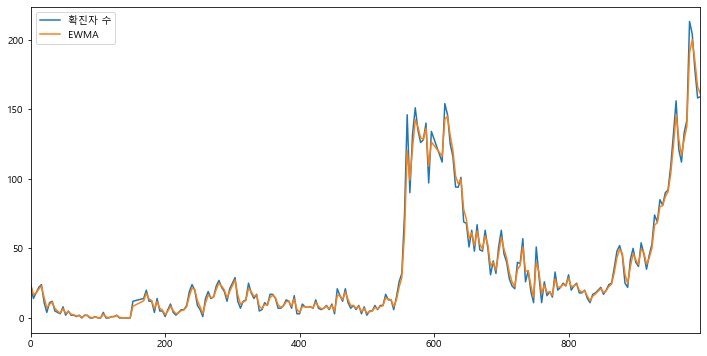

In [85]:
df1[['확진자 수',  'EWMA']].plot(figsize=(12,6)).autoscale(axis='x',tight=True)

In [86]:
mae(df1['EWMA'],df1['확진자 수'])

2.5371798350798707

SMA : 단순이동 평균

In [88]:
df1['SMA']=df1["확진자 수"].rolling(window= 15).mean()

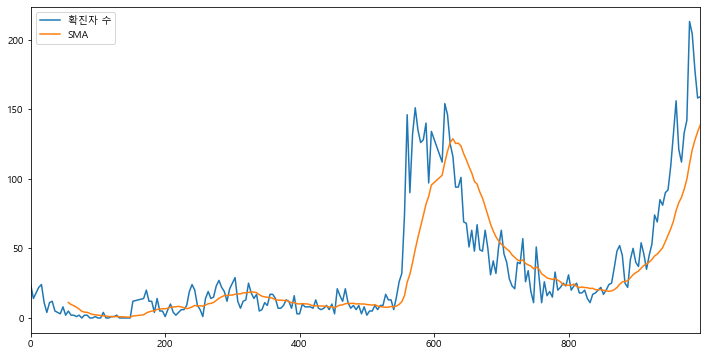

In [89]:
df1[['확진자 수',  'SMA']].plot(figsize=(12,6)).autoscale(axis='x',tight=True)

In [90]:
mae(df1['SMA'].fillna(0),df1['확진자 수'])

14.077868852459016

ARIMA

In [160]:
p = list(range(0, 6))
d = [0, 1, 2]
q = list(range(0, 6))

pdq = list(itertools.product(p, d, q))

In [161]:
best_score = 10000000
best_param = 0
for param in pdq:
    try:
        arima_model = ARIMA(y_train, order=param)
        result = arima_model.fit()
        if result.aic < best_score:
            best_score = result.aic
            best_param = param
    except:
        continue
        
set_arima = ARIMA(y_train, order=best_param)
set_result = set_arima.fit()
set_pred = set_result.forecast(len(y_test))[0]

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\ProgramData\Anaconda3\lib\site-packages\statsmode

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\ProgramData\Anaconda3\lib\site-packages\statsmode

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\ProgramData\Anaconda3\lib\site-packages\statsmode

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\ProgramData\Anaconda3\lib\site-packages\statsmode

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\ProgramData\Anaconda3\lib\site-packages\statsmode

In [162]:
arima_sum_sub = pd.DataFrame({'ARIMA' :set_pred , '확진자 수' : y_test})

In [163]:
mae(arima_sum_sub['ARIMA'].fillna(0),arima_sum_sub['확진자 수'])

63.30749311012393